In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
X = 6*np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X+ 2 + np.random.rand(100,1)
# quadratic equation used- 0.5

Text(0, 0.5, 'Y dataset')

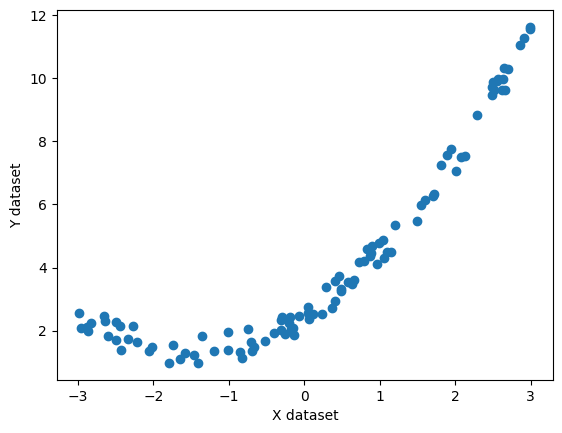

In [7]:
plt.scatter(X,y)
plt.xlabel("X dataset")
plt.ylabel("Y dataset")

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
## Let implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score
score = r2_score(y_test,lin_reg.predict(X_test))
score

0.7579515364796255

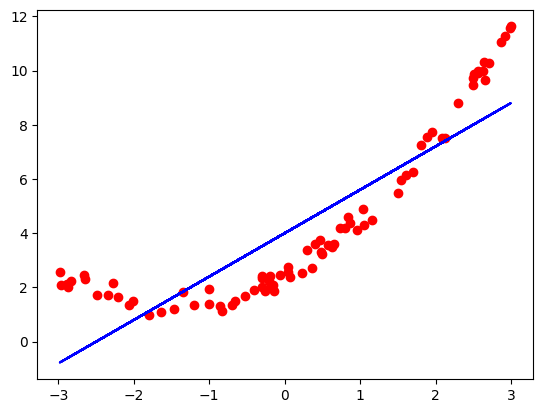

In [12]:
# lets visulaize this model
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,lin_reg.predict(X_train),color='blue')

In [13]:
# lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [14]:
ploy = PolynomialFeatures(degree=4,include_bias=True)

In [15]:
X_train_poly = ploy.fit_transform(X_train)
X_test_poly = ploy.fit_transform(X_test)

In [16]:
rg = LinearRegression()
rg.fit(X_train_poly,y_train)
y_prdt = rg.predict(X_test_poly)
score = r2_score(y_test,y_prdt)
score

0.985505040754021

In [17]:
rg.coef_

array([[ 0.00000000e+00,  1.53312113e+00,  5.29615899e-01,
         2.13734353e-05, -2.11187865e-03]])

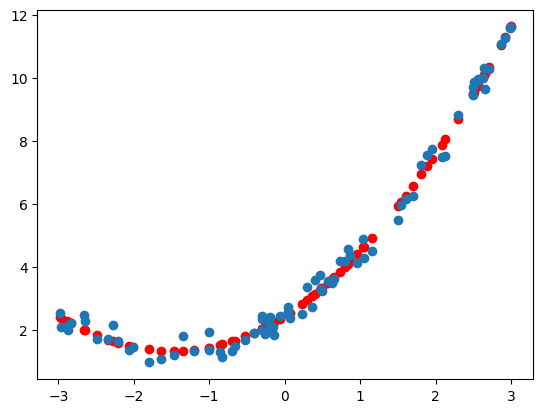

In [20]:
plt.scatter(X_train,rg.predict(X_train_poly),color='red')
plt.scatter(X_train,y_train)

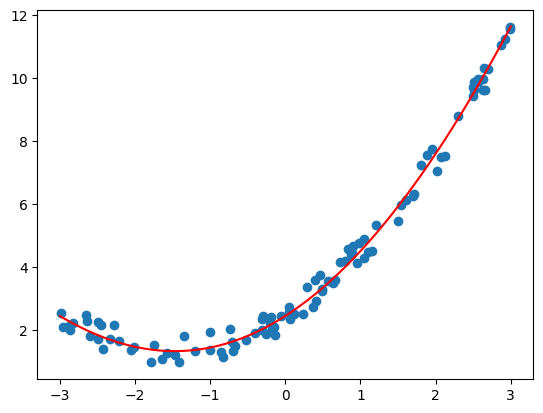

In [21]:
# Prediction of new data set
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = ploy.fit_transform(X_new)
y_new = rg.predict(X_new_poly)
plt.plot(X_new,y_new,color='red')
plt.scatter(X,y)